In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

 ## DOMAIN: Healthcare


 ## CONTEXT :  
1.Medical  research  university  X  is  undergoing  a  deep  research  on  patients
with  certain  conditions.

2.University  has  an  internal  AI  team. 
    
3.Due  to  confidentiality  the  patient’s  details  and  the  conditions  are  masked  by the  client
by  providing  different  datasets  to  the  AI  team  for  developing  a  AIML  model 
which  can  predict  the condition of the patient depending on the received test results


    

## DATA  DESCRIPTION:
1.The  data  consists  of  biomechanics  features  of  the  patients  according  to  their  current condition.

2.Each patient is represented in the data set by six biomechanics attributes
 derived from the shape and orientation of the condition to their body part.


1.pelvic_incidence - P_incidence - ( Angle at the back bone , how much it bend .)

2.pelvic_tilt numeric - P_tilt - ( angel for the body , which is st)

3.lumbar_lordosis_angle - L_angle - ( how much angel spinal bend)

4.sacral_slope - S_slope - ( how much angel the butt bones are there )

5.pelvic_radius - P_radius - ( radius between the butt and spinal)

6.degree_spondylolisthesis - S_degree  ( degree of angle between butt and spinal )

7.Class - normal, type S , type H

In [2]:
files = glob('data*.csv')
files

['data1.csv', 'data2.csv', 'data3.csv']

In [3]:
df=  pd.concat((pd.read_csv(file)for file in files),ignore_index=True)#concating two files into one

In [4]:
df


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [5]:
df.size

2170

In [6]:
df.shape

(310, 7)

In [7]:
df.head(50)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S
5,83.933009,41.286305,62.000000,42.646703,115.012334,26.588100,Type_S
6,78.491730,22.181798,60.000000,56.309932,118.530327,27.383213,Type_S
7,75.649731,19.339799,64.148685,56.309932,95.903629,69.551303,Type_S
8,72.076278,18.946176,51.000000,53.130102,114.213013,1.010041,Type_S
9,58.599529,-0.261499,51.500000,58.861028,102.042812,28.059697,Type_S


In [8]:
df.tail(50)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
260,54.142408,11.935110,43.000000,42.207298,122.209083,0.153549,Normal
261,74.976021,14.921705,53.730072,60.054317,105.645400,1.594748,Normal
262,42.517272,14.375671,25.323565,28.141601,128.905689,0.757020,Normal
263,33.788843,3.675110,25.500000,30.113733,128.325356,-1.776111,Normal
264,54.503685,6.819910,47.000000,47.683775,111.791172,-4.406769,Normal
265,48.170746,9.594217,39.710920,38.576530,135.623310,5.360051,Normal
266,46.374088,10.215902,42.700000,36.158185,121.247657,-0.542022,Normal
267,52.862214,9.410372,46.988052,43.451842,123.091240,1.856659,Normal
268,57.145851,16.489091,42.842148,40.656760,113.806178,5.015186,Normal
269,37.140150,16.481240,24.000000,20.658910,125.014361,7.366425,Normal


In [9]:
type(df['Class'])

pandas.core.series.Series

In [10]:
df['Class'].replace('Nrmal','Normal',inplace=True)#cleaning and correcting the data of each attribute

In [11]:
df.tail(90)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
220,44.489275,21.786433,31.474154,22.702842,113.778494,-0.284129,Normal
221,54.950970,5.865353,53.000000,49.085617,126.970328,-0.631603,Normal
222,56.103774,13.106307,62.637020,42.997467,116.228503,31.172767,Normal
223,69.398818,18.898407,75.966361,50.500411,103.582540,-0.443661,Normal
224,89.834676,22.639217,90.563461,67.195460,100.501192,3.040973,Normal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [12]:
df['Class'].replace('tp_s','Type_S',inplace=True)
df.head(138)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S
...,...,...,...,...,...,...,...
133,70.250436,10.340123,76.370070,59.910314,119.237007,32.666502,Type_S
134,72.643850,18.929117,68.000000,53.714733,116.963416,25.384247,Type_S
135,71.241764,5.268270,85.999584,65.973493,110.703107,38.259864,Type_S
136,63.772391,12.763385,65.360524,51.009006,89.822741,55.995454,Type_S


In [13]:
df['Class'].replace('type_h','Type_H',inplace=True)

In [14]:
df.head(188)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S
...,...,...,...,...,...,...,...
183,38.663257,12.986441,40.000000,25.676816,124.914118,2.703008,Type_H
184,59.595540,31.998244,46.560252,27.597296,119.330354,1.474286,Type_H
185,31.484218,7.826221,24.284818,23.657997,113.833145,4.393080,Type_H
186,32.090987,6.989378,35.998198,25.101609,132.264735,6.413428,Type_H


In [15]:
df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [16]:
df.describe()# applying stastical concept for each attribute

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


array([[<AxesSubplot:title={'center':'P_incidence'}>,
        <AxesSubplot:title={'center':'P_tilt'}>],
       [<AxesSubplot:title={'center':'L_angle'}>,
        <AxesSubplot:title={'center':'S_slope'}>],
       [<AxesSubplot:title={'center':'P_radius'}>,
        <AxesSubplot:title={'center':'S_Degree'}>]], dtype=object)

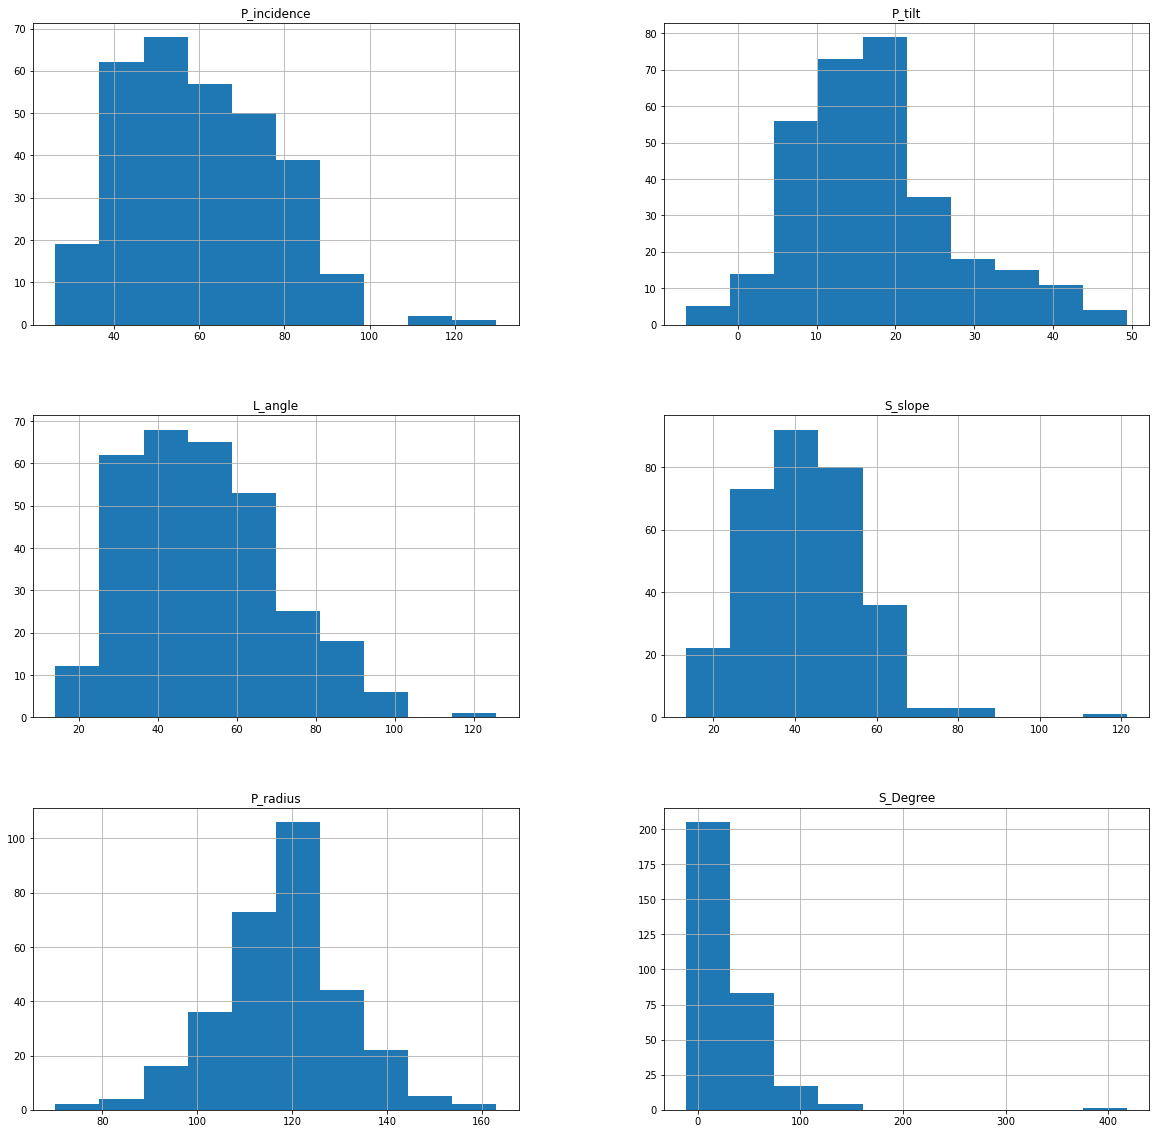

In [17]:
df.hist(figsize=(20,20))

<AxesSubplot:xlabel='S_Degree'>

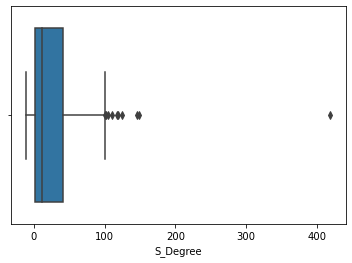

In [18]:
sns.boxplot(x=df['S_Degree'])

<AxesSubplot:xlabel='P_radius'>

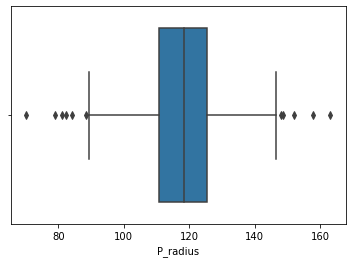

In [19]:
sns.boxplot(x=df['P_radius'])

<AxesSubplot:xlabel='S_slope'>

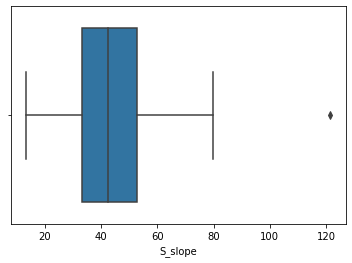

In [20]:
sns.boxplot(x=df['S_slope'])

<AxesSubplot:xlabel='L_angle'>

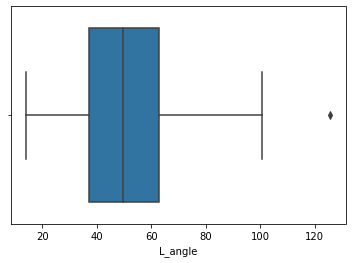

In [21]:
sns.boxplot(x=df['L_angle'])

<AxesSubplot:xlabel='P_tilt'>

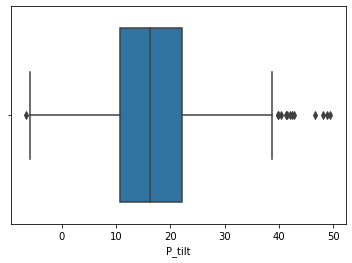

In [22]:
sns.boxplot(x=df['P_tilt'])

<AxesSubplot:xlabel='P_incidence'>

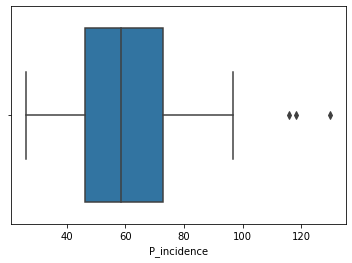

In [23]:
sns.boxplot(x=df['P_incidence'])

<AxesSubplot:xlabel='Class', ylabel='P_incidence'>

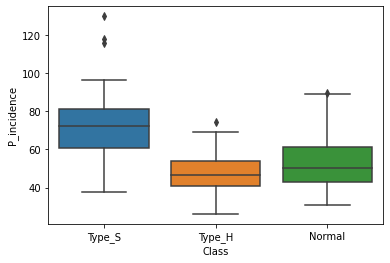

In [24]:
sns.boxplot(x="Class",y="P_incidence", data=df)# bivariate analysis for CLASS and P_INCIDENCE ,observing statistics

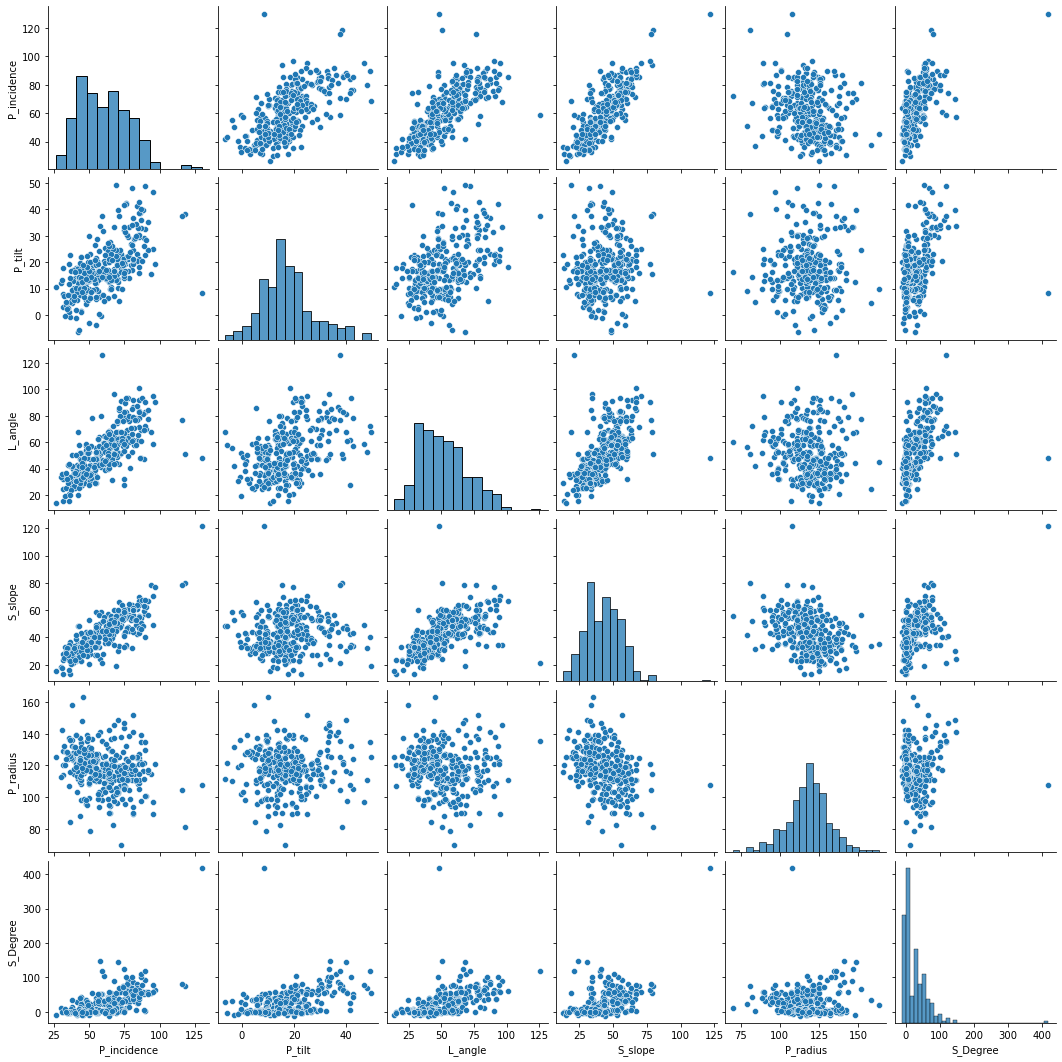

In [25]:
sns.pairplot(df)# multivariate analysis and comparing each attribute and degree of corelation between two column

<AxesSubplot:xlabel='P_incidence', ylabel='count'>

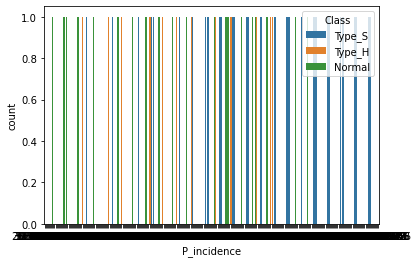

In [26]:
sns.countplot(x="P_incidence",hue="Class", data=df)

In [27]:
corr=df.corr()
corr

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


<AxesSubplot:>

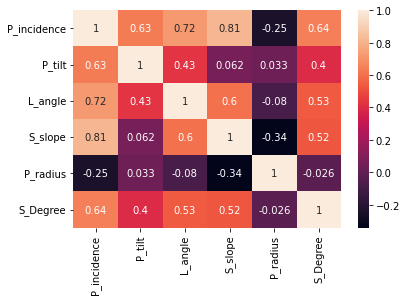

In [28]:
sns.heatmap(corr, annot=True)

In [29]:
# discriptive statistical analysis
print("data:",df.mean())

data: P_incidence     60.496653
P_tilt          17.542822
L_angle         51.930930
S_slope         42.953831
P_radius       117.920655
S_Degree        26.296694
dtype: float64


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23748/2116138579.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("data:",df.mean())


In [30]:
print("data:",df.mode())

data:      P_incidence     P_tilt  L_angle    S_slope    P_radius    S_Degree  \
0      26.147921  -6.554948     35.0  33.111342   70.082575  -11.058179   
1      30.149936  -5.845994     42.0  35.417055   78.999454  -10.675871   
2      30.741938  -3.759930     47.0  45.000000   81.024541  -10.093108   
3      31.232387  -2.970024     52.0  56.309932   82.456038   -9.569250   
4      31.276012  -1.329412      NaN        NaN   84.241415   -8.941709   
..           ...        ...      ...        ...         ...         ...   
305    95.480229  42.689195      NaN        NaN  147.894637  118.353370   
306    96.657315  46.550053      NaN        NaN  148.525562  124.984406   
307   115.923261  48.069531      NaN        NaN  151.839857  145.378143   
308   118.144655  48.903653      NaN        NaN  157.848799  148.753711   
309   129.834041  49.431864      NaN        NaN  163.071041  418.543082   

      Class  
0    Type_S  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
..      .

In [31]:
print("data:",df.median())

data: P_incidence     58.691038
P_tilt          16.357689
L_angle         49.562398
S_slope         42.404912
P_radius       118.268178
S_Degree        11.767934
dtype: float64


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23748/4258626821.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("data:",df.median())


In [32]:
print("data_quantile(25%):",df.quantile(q=0.25))

data_quantile(25%): P_incidence     46.430294
P_tilt          10.667069
L_angle         37.000000
S_slope         33.347122
P_radius       110.709196
S_Degree         1.603727
Name: 0.25, dtype: float64


In [33]:
print("data_quantile(50%):",df.quantile(q=0.50))

data_quantile(50%): P_incidence     58.691038
P_tilt          16.357689
L_angle         49.562398
S_slope         42.404912
P_radius       118.268178
S_Degree        11.767934
Name: 0.5, dtype: float64


In [34]:
print("data_quantile(75%):",df.quantile(q=0.75))

data_quantile(75%): P_incidence     72.877696
P_tilt          22.120395
L_angle         63.000000
S_slope         52.695888
P_radius       125.467674
S_Degree        41.287352
Name: 0.75, dtype: float64


In [35]:
df["P_incidence"].quantile(0.75)-df["P_incidence"].quantile(0.25)#inteer quartile range for p_incidence

26.447401299999996

In [36]:
df.skew()

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_23748/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


P_incidence    0.520440
P_tilt         0.676553
L_angle        0.599451
S_slope        0.792577
P_radius      -0.176835
S_Degree       4.317954
dtype: float64

In [37]:
#identifying duplicate data 
dupes = df.duplicated()
sum(dupes)

0

In [38]:
pd.DataFrame( df.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
P_incidence,0
P_tilt,0
L_angle,0
S_slope,0
P_radius,0
S_Degree,0
Class,0


In [39]:
df.isnull().values.any()


False

## Dealing with Outlayers

In [40]:
from scipy import stats

In [41]:
df1 = df.drop(columns='Class', axis=1)
z = np.abs(stats.zscore(df1))   # get the z-score of every value with respect to their columns
print(z)

     P_incidence    P_tilt   L_angle   S_slope  P_radius  S_Degree
0       0.806628  1.452165  1.448981  0.046954  1.928420  0.795480
1       1.695882  1.517349  1.684280  1.046328  0.905154  1.752890
2       0.927880  0.811594  0.003729  0.586356  1.262881  0.074933
3       0.999142  0.384083  0.674716  0.996617  0.233298  0.016938
4       0.909456  0.439680  1.675145  0.839999  0.452122  0.423077
..           ...       ...       ...       ...       ...       ...
305     0.731786  0.392921  0.860010  0.646718  0.035469  0.814491
306     0.381197  0.318116  1.225991  0.726682  0.267362  0.712503
307     0.055201  0.515618  0.310977  0.313564  0.582893  0.773488
308     0.885823  0.885660  0.558613  0.477128  0.047021  0.695548
309     1.548927  1.247860  0.825394  1.058557  0.453117  0.706589

[310 rows x 6 columns]


In [42]:
df2 = df1.copy()


In [43]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

P_incidence    26.447401
P_tilt         11.453326
L_angle        26.000000
S_slope        19.348766
P_radius       14.758478
S_Degree       39.683625
dtype: float64


In [44]:
# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(df2 < Q1 - 1.5 * IQR)[0], np.where(df2 < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    df2.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(df2 > Q3 + 1.5 * IQR)[0], np.where(df2 > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    df2.iloc[i,j] = whisker[j]
    

In [45]:
df2.shape, df.shape

((310, 6), (310, 7))

In [46]:
df2.skew() # skews are in range

P_incidence    0.380674
P_tilt         0.455367
L_angle        0.490732
S_slope        0.281106
P_radius      -0.128388
S_Degree       0.989762
dtype: float64

## Normalization

In [47]:
X=df2

from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
minmax_scale
df2[X.columns] = minmax_scale.fit_transform(df2[X.columns])

In [48]:
df['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [49]:
X

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,0.558209,0.841808,0.736046,0.423654,0.931485,0.600550
1,0.735324,0.856025,0.785577,0.638008,0.701021,0.921467
2,0.212742,0.348068,0.431818,0.317896,0.781590,0.359027
3,0.596552,0.608853,0.573062,0.628262,0.444613,0.339588
4,0.578690,0.620979,0.783653,0.597554,0.598987,0.192098
...,...,...,...,...,...,...
305,0.251799,0.439383,0.250000,0.306061,0.489169,0.060899
306,0.321627,0.594465,0.172961,0.290383,0.436941,0.095084
307,0.408545,0.637542,0.365572,0.371381,0.628440,0.074642
308,0.221119,0.331914,0.313445,0.339312,0.507748,0.100767


## Dimensional reduction

In [50]:
from sklearn.decomposition import PCA

In [51]:
covMatrix = np.cov(X,rowvar=False)
print(covMatrix)

[[ 0.03846421  0.02650671  0.03017917  0.02987168 -0.01034122  0.03433843]
 [ 0.02650671  0.04371432  0.01904557  0.00344561  0.001839    0.0275869 ]
 [ 0.03017917  0.01904557  0.04322429  0.02512786 -0.00375637  0.03661872]
 [ 0.02987168  0.00344561  0.02512786  0.0353373  -0.01428189  0.02346827]
 [-0.01034122  0.001839   -0.00375637 -0.01428189  0.0458096  -0.0023954 ]
 [ 0.03433843  0.0275869   0.03661872  0.02346827 -0.0023954   0.0663315 ]]


In [52]:
pca = PCA(n_components=6)
pca.fit(X)

PCA(n_components=6)

In [53]:
print(pca.explained_variance_)

[0.15455055 0.0540637  0.03101836 0.02121353 0.01184833 0.00018675]


In [54]:
print(pca.components_)

[[ 4.64831273e-01  3.40631830e-01  4.54814001e-01  3.48253622e-01
  -1.12493803e-01  5.71935860e-01]
 [-8.97334463e-02  3.94343003e-01  1.33252127e-02 -3.86465923e-01
   7.99077483e-01  2.19961838e-01]
 [ 9.52496320e-02  7.22112675e-01 -2.75846214e-01 -3.73826992e-01
  -4.79259414e-01 -1.54769032e-01]
 [-3.72509051e-01 -2.35019451e-01 -2.05330765e-01 -3.35069966e-01
  -2.91664462e-01  7.52663338e-01]
 [ 3.32993098e-01  2.66159948e-03 -8.21210454e-01  3.83270557e-01
   1.84559384e-01  1.83748242e-01]
 [ 7.19138309e-01 -3.89583895e-01  1.81161828e-02 -5.74846660e-01
  -6.40705415e-04 -1.69467225e-02]]


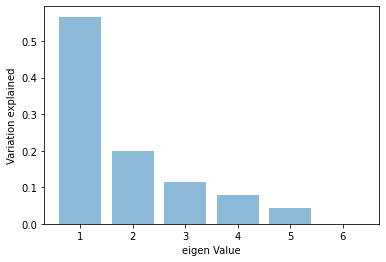

In [55]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

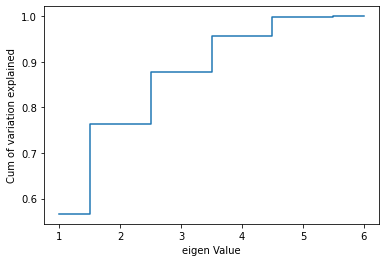

In [56]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [57]:
pca4 = PCA(n_components=4)
pca4.fit(X)
print(pca4.components_)
print(pca4.explained_variance_ratio_)
Xpca4 = pca4.transform(X)

[[ 0.46483127  0.34063183  0.454814    0.34825362 -0.1124938   0.57193586]
 [-0.08973345  0.394343    0.01332521 -0.38646592  0.79907748  0.21996184]
 [ 0.09524963  0.72211267 -0.27584621 -0.37382699 -0.47925941 -0.15476903]
 [-0.37250905 -0.23501945 -0.20533077 -0.33506997 -0.29166446  0.75266334]]
[0.56636563 0.19812174 0.11366982 0.07773907]


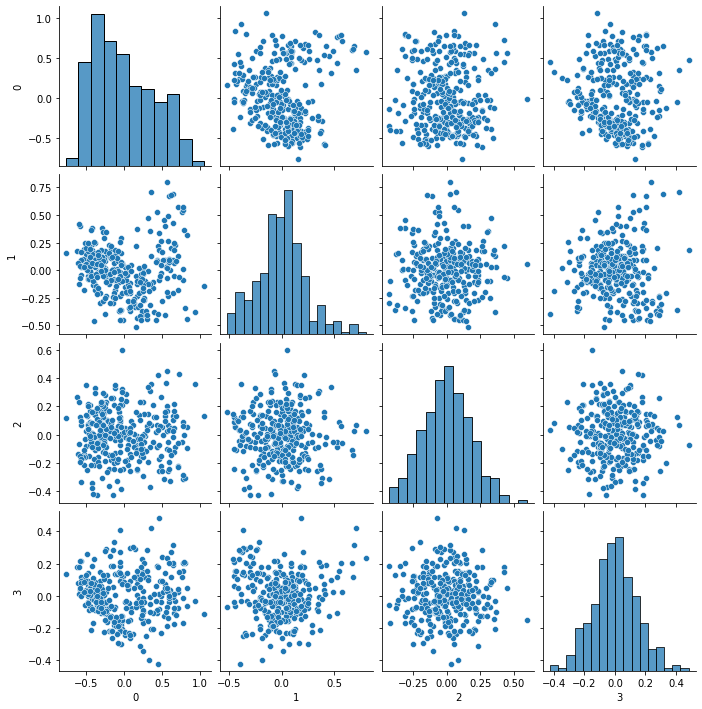

In [58]:
sns.pairplot(pd.DataFrame(Xpca4))

In [59]:
Xpca4

array([[ 0.43252837,  0.52684794, -0.08611561, -0.11109263],
       [ 0.82634684,  0.32081137, -0.09198933,  0.04635652],
       [-0.1927093 ,  0.22705887, -0.24288322,  0.09347308],
       ...,
       [-0.16001509,  0.11715508,  0.10049161, -0.22119396],
       [-0.3576009 , -0.06554484, -0.05789166, -0.003234  ],
       [-0.52354851,  0.0307338 , -0.11267229,  0.08479655]])

In [60]:
#y=df["Class"]

In [61]:
#y

In [62]:
df['Class'].replace('Type_H','1',inplace=True)
df['Class'].replace('Type_S','0',inplace=True)
df['Class'].replace('Normal','2',inplace=True)

In [63]:
y=df["Class"]

In [64]:
y

0      0
1      0
2      0
3      0
4      0
      ..
305    2
306    2
307    2
308    2
309    2
Name: Class, Length: 310, dtype: object

In [65]:
y[150]

'1'

In [66]:
from  scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [67]:
#split x and y train and test in 70:30 ratio

X_train,X_test,y_train,y_test=train_test_split(Xpca4,y,test_size=0.30,stratify =y ,random_state=5) 

In [68]:
X_test

array([[-5.73428580e-02, -5.71999344e-02, -1.24145335e-01,
        -2.18015801e-01],
       [-2.24005013e-01, -5.66824648e-02, -2.63288353e-01,
        -1.65899615e-01],
       [-1.81127341e-01, -3.58717737e-02, -2.29328257e-02,
        -1.31248867e-01],
       [-3.38497211e-01, -1.62014742e-01, -9.18325546e-02,
        -3.05544876e-02],
       [ 6.17001727e-01,  2.00042836e-01,  4.50133660e-02,
         2.73778366e-01],
       [ 4.99973858e-01, -2.83876858e-01,  5.25737153e-02,
         2.39985556e-01],
       [-4.49125599e-01, -2.23199384e-02,  8.69503208e-02,
         5.50205050e-02],
       [-3.57876449e-01,  5.89424505e-02,  1.09665815e-01,
        -1.83770715e-02],
       [ 1.73491460e-01, -1.21945642e-01, -1.23965136e-02,
         5.60087778e-03],
       [-5.22773891e-01,  1.95283229e-01, -1.39035151e-01,
         1.05376588e-01],
       [-2.25178618e-01, -5.96190701e-03, -9.87718337e-03,
         1.28601738e-01],
       [-4.10958779e-01, -1.39542371e-01,  5.94669080e-03,
      

In [69]:
y_test

236    2
221    2
284    2
300    2
44     0
      ..
190    1
159    1
154    1
277    2
224    2
Name: Class, Length: 93, dtype: object

In [70]:
X_train

array([[ 7.70731150e-01,  7.80976301e-03, -2.84417751e-01,
        -1.57356705e-02],
       [ 5.68932533e-02, -1.58855994e-02, -7.06177481e-02,
         4.37471815e-02],
       [ 1.67065175e-01, -2.39528489e-01, -2.47930712e-01,
         1.06484542e-01],
       [-4.69663022e-01, -7.74751087e-02,  5.01461177e-02,
        -4.24516088e-02],
       [-1.90003618e-01, -3.64674662e-02, -1.44562323e-01,
        -7.42059585e-02],
       [ 1.77428046e-02,  2.44182235e-02, -1.81479625e-02,
        -3.67594167e-02],
       [ 1.14117549e-01, -3.04076103e-01, -4.54128230e-02,
         3.04181678e-01],
       [ 5.65994462e-01, -7.32439647e-02,  4.50923209e-01,
         4.74017010e-02],
       [-2.87714516e-01,  3.83861983e-01, -3.07409101e-01,
        -2.15788917e-02],
       [-3.83746970e-01,  2.93469091e-02,  3.29910632e-01,
         8.80631342e-02],
       [ 9.66257217e-02, -7.69004068e-03, -1.57017876e-01,
        -1.00076442e-01],
       [ 5.82305435e-01,  4.92535097e-01, -5.52744274e-02,
      

In [71]:
y_train

148    0
93     0
48     0
157    1
256    2
      ..
89     0
210    2
257    2
97     0
111    0
Name: Class, Length: 217, dtype: object

## Balancing data using over sampling

In [72]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=4)
X_oversampled , y_oversampled = sm.fit_resample(X_train, y_train)

In [73]:
# Summarize the fraud class distribution of the new SMOTE-transformed dataset
unique_original, counts_original = np.unique(y, return_counts=True)
unique_oversampled, counts_oversampled = np.unique(y_oversampled, return_counts=True)

print('Original class distribution:', dict(zip(unique_original, counts_original)))
print('New class distribution:',dict(zip(unique_oversampled, counts_oversampled)))

Original class distribution: {'0': 150, '1': 60, '2': 100}
New class distribution: {'0': 105, '1': 105, '2': 105}


In [74]:
X_oversampled 

array([[ 0.77073115,  0.00780976, -0.28441775, -0.01573567],
       [ 0.05689325, -0.0158856 , -0.07061775,  0.04374718],
       [ 0.16706517, -0.23952849, -0.24793071,  0.10648454],
       ...,
       [-0.38230524,  0.07830249, -0.11614094, -0.06244953],
       [ 0.08830674, -0.21532474,  0.05485212, -0.25857016],
       [-0.2925729 ,  0.09887259,  0.12313909, -0.02335535]])

In [75]:
counts_oversampled

array([105, 105, 105], dtype=int64)

In [76]:
y_oversampled

0      0
1      0
2      0
3      1
4      2
      ..
310    2
311    2
312    2
313    2
314    2
Name: Class, Length: 315, dtype: object

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
KNN=KNeighborsClassifier(n_neighbors= 5)
#call nearest neighbors algorithm
KNN.fit(X_oversampled,y_oversampled )

KNeighborsClassifier()

In [79]:
print("Accuracy:",KNN.score(X_oversampled,y_oversampled))
predicted_labels = KNN.predict(X_test)
KNN.score(X_test,y_test)

Accuracy: 0.9333333333333333


0.8494623655913979

In [80]:
predicted_labels

array(['2', '2', '2', '1', '0', '0', '1', '1', '0', '2', '1', '1', '0',
       '1', '2', '0', '2', '1', '1', '0', '0', '0', '2', '0', '2', '0',
       '2', '2', '0', '0', '2', '1', '2', '1', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '1', '0', '2', '0', '0', '2', '0', '2', '2',
       '2', '2', '1', '2', '2', '0', '1', '1', '0', '2', '1', '0', '1',
       '1', '0', '2', '2', '0', '0', '0', '0', '0', '0', '2', '2', '1',
       '1', '0', '0', '1', '0', '2', '0', '0', '0', '0', '1', '1', '1',
       '2', '0'], dtype=object)

In [81]:
KNN.score(X_test,y_test)

0.8494623655913979

In [ ]:
#By the given data ,We have detailed analysis using KNN model  where the prediction was 80% with the given data